# Car Rental Company

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import mpl_config

In [2]:
# initial probability in Orlando
po_0 = 1
# initial probability in Tampa
pt_0 = 0

## Brute-force modeling

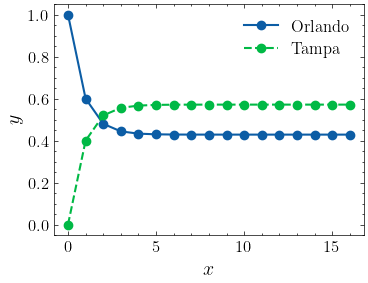

In [3]:
po = po_0
pt = pt_0
po_list = [po]
pt_list = [pt]
for i in range(16):
    po = 0.6 * po_list[-1] + 0.3 * pt_list[-1]
    pt = 0.4 * po_list[-1] + 0.7 * pt_list[-1]
    po_list.append(po)
    pt_list.append(pt)

plt.plot(po_list, label="Orlando", marker="o")
plt.plot(pt_list, label="Tampa", marker="o", linestyle="--")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

Problems
- Why use `po_list[-1]` and `pt_list[-1]` intead of `po` and `pt` in the loop?
- What is the difference with stochastic population growth and solving IVP?
- Will different initial condition affect the final converged probability?

## By matrix multiplication

In [4]:
# the transition matrix
# present state is row and future state is column
T = np.array([[0.6, 0.4], [0.3, 0.7]])
T

array([[0.6, 0.4],
       [0.3, 0.7]])

In [5]:
# The initial condition
v0 = np.array([1, 0])

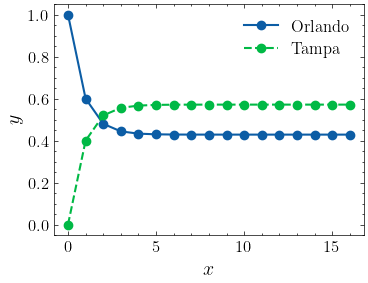

In [6]:
v = v0
v_list = [v]
for i in range(16):
    v =  v @ T
    v_list.append(v)

v_list = np.array(v_list)
plt.plot(v_list[:, 0], label="Orlando", marker="o")
plt.plot(v_list[:, 1], label="Tampa", marker="o", linestyle="--")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

Problems
- Why multiply $v$ to the left of $T$?
- What is the computational complexity? Is it higher, lower, or the same with the brute-force method?

# By matrix decomposition

In [7]:
lam, u = np.linalg.eig(T)

In [8]:
lam

array([0.3, 1. ])

In [9]:
u

array([[-0.8       , -0.70710678],
       [ 0.6       , -0.70710678]])

In [10]:
# the same as T
u @ np.diag(lam) @ np.linalg.inv(u)

array([[0.6, 0.4],
       [0.3, 0.7]])

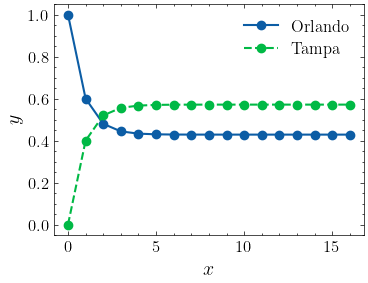

In [11]:
v_list = [v0]
for i in range(16):
    v = v0 @ u @ np.diag(lam) ** (i + 1) @ np.linalg.inv(u)
    v_list.append(v)

v_list = np.array(v_list)
plt.plot(v_list[:, 0], label="Orlando", marker="o")
plt.plot(v_list[:, 1], label="Tampa", marker="o", linestyle="--")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

Problems
- What is the computational complexity? Which is the most efficient method when only the long time limit is desired?
- Which method do you like most (what are the pros and cons)?